# Arrest Data by County in Allegheny County

### The Neighborhood with the Most Arrests:

In [17]:
import csv

import pandas as pd

data = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")

arrest_by_zip = data.groupby('INCIDENTNEIGHBORHOOD')['_id'].nunique()

max_arrests = arrest_by_zip.max()
zip_codes_with_max_arrests = arrest_by_zip[arrest_by_zip == max_arrests].index.tolist()


for zip_code in zip_codes_with_max_arrests:
    print(zip_code)
    
print()

Central Business District



### The Total Arrests in Mt. Lebanon:

In [18]:
search = "Mt. Lebanon"
search2 = "Mount Lebanon"

arrests_in_neighborhood = data[data['ARRESTLOCATION'].str.contains(search)]
arrests_in_neighborhood2 = data[data['ARRESTLOCATION'].str.contains(search2)]

num_arrests_in_neighborhood = arrests_in_neighborhood['_id'].nunique()
num_arrests_in_neighborhood2 = arrests_in_neighborhood['_id'].nunique()

arrests_i = data[data['INCIDENTLOCATION'].str.contains(search)]
arrests_q = data[data['INCIDENTLOCATION'].str.contains(search2)]

num_arrests = arrests_i['_id'].nunique()
num_arrests2 = arrests_i['_id'].nunique()

print(f"Number of incidents in {search}: {num_arrests_in_neighborhood}")

Number of incidents in Mt. Lebanon: 3


### Arrests by Neighborhood Graphed:

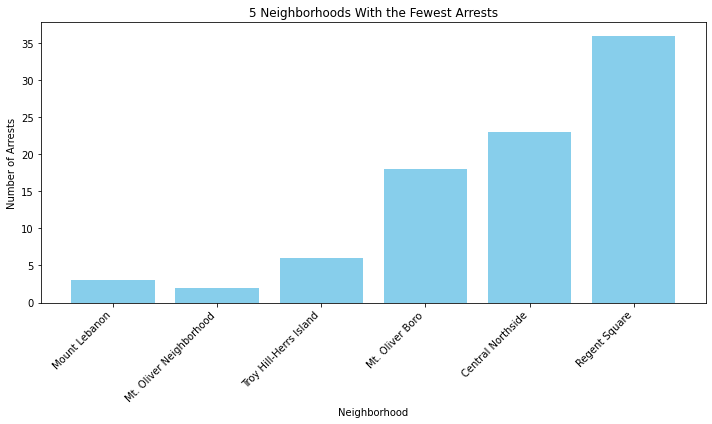

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")

arrest_by_neighborhood = data.groupby('INCIDENTNEIGHBORHOOD')['_id'].nunique()

neighborhoods_with_fewest_arrests = arrest_by_neighborhood.nsmallest(5).index.tolist()

if "Mount Lebanon" not in arrest_by_neighborhood:
    arrest_by_neighborhood.loc["Mount Lebanon"] = 3

arrest_by_neighborhood = arrest_by_neighborhood.sort_values(ascending=True)

labels = ['Mount Lebanon'] + neighborhoods_with_fewest_arrests
values = [arrest_by_neighborhood.loc[label] for label in labels]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue')
plt.title('5 Neighborhoods With the Fewest Arrests')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


# Conclusion

This graph depicts the 5 neighborhoods in Pittsburgh with the fewest total arrests since the database was created in 1998. As shown in the graph, Mt. Lebanon has one of the fewest arrests of the other neighorhoods with just three total in about a quarter-century span. Despite other neighborhoods with few arrests such as Mt. Oliver and Troy Hill-Herrs, Mt. Lebanon ranks the best among them all. As when debating which neighborhood is the safest in Pittsburgh, the number of total arrests is a great marker and Mt. Lebanon has one of the fewest. This graph helps prove that Mt. Lebanon is the best neighborhood in Pittsburgh.